### Let's start by importing the required libraries
#### Will add to this section and rerun any libraries required during the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Read the data file

In [3]:
bikedb = pd.read_csv('day.csv')
bikedb

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [4]:
bikedb.shape

(730, 16)

### Understanding the Data
#### The data file has 730 rows covering 2 years 2018 and 2019. The data contains 16 columns (instance (index), dteday, and 14 data columns). 

In [5]:
#checking the detailed data information
bikedb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Dropping useless columns
#### The instance and dteday represent a serial number (index) and the date the information was gathered (date is also presented as year, month, weakday) Thus these columns are useless for the analysis.
#### The cnt column represent the sum of the casual and regostered users. As we are analyzing the total rental (cnt) and not interested in each category (casual or registered) separately, then the 2 columns casual and registered are not significant in our analysis and can be dropped.

In [6]:
# Dropping the 4 useless columns for analysis (instant, dteday, casual, and registered 
bikedb.drop(['instant'],axis=1,inplace=True)
bikedb.drop(['dteday'],axis=1,inplace=True)
bikedb.drop(['casual'],axis=1,inplace=True)
bikedb.drop(['registered'],axis=1,inplace=True)
bikedb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# Let's check the existance of missed (null values)
bikedb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [8]:
#All columns have data (730 values); No missing values to handle
#To confirm no missing values!
bikedb.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [9]:
#Check for any duplicate rows
dup_rows = bikedb.duplicated()
dup_rows.value_counts()

False    730
dtype: int64

In [10]:
#Above result shows no duplicates in the dataset; 730 rows where duplicated = False
#Let's check now the unique values in each column
bikedb.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### The 12 columns are divided as 7 categorical variables (season, yr, mnth, holiday, weekday, workingday, and weathersit), and 5 numerical variables (temp, atemp, hum, windspeed, and cnt). 

### Data Validation
#### Categorical variable let's validate the values to match them with dictionary. 

In [11]:
bikedb['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
bikedb['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [13]:
bikedb['mnth'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [14]:
bikedb['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
bikedb['weekday'].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [16]:
bikedb['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [17]:
bikedb['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

#### As all Categorical variables values are verified to match dictionary values; Let's change these variables to more meaningful values as defined in the dictionary.
#### holiday and workingday with values 1 or 0 referring to True or False.

In [18]:
#changing categorical data which were primarily numeric to more meaningful one
bikedb.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bikedb.weathersit.replace({1:'clear',2:'cloudy',3:'rainy'},inplace = True)   #Value 4 defined in dictionary is not available in data
bikedb.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace= True)
bikedb.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
bikedb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### Validate numerical variables and check for any outliers

In [19]:
bikedb.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


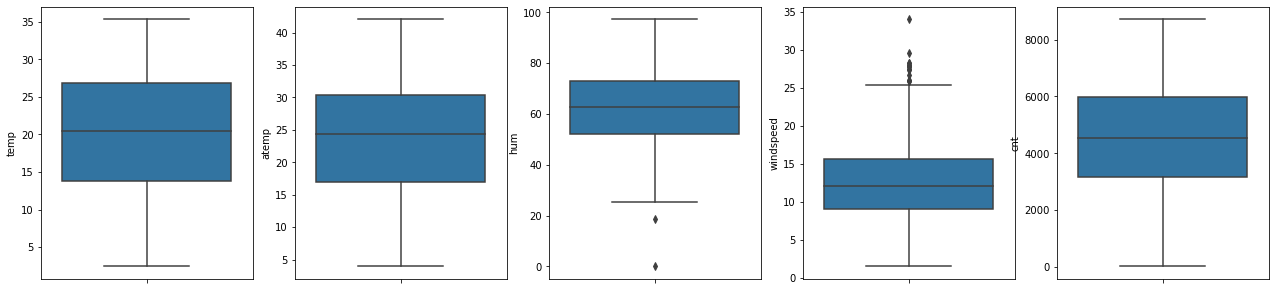

In [20]:
cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(22,5))

i = 1
for col in cols:
    plt.subplot(1,5,i)
    sns.boxplot(y=col, data=bikedb)
    i+=1

#### Numerical variables distribution, values, and the boxplots verify that there are no outliers.
### Now let's check for linear relationship between numerical variables.

<Figure size 1080x2160 with 0 Axes>

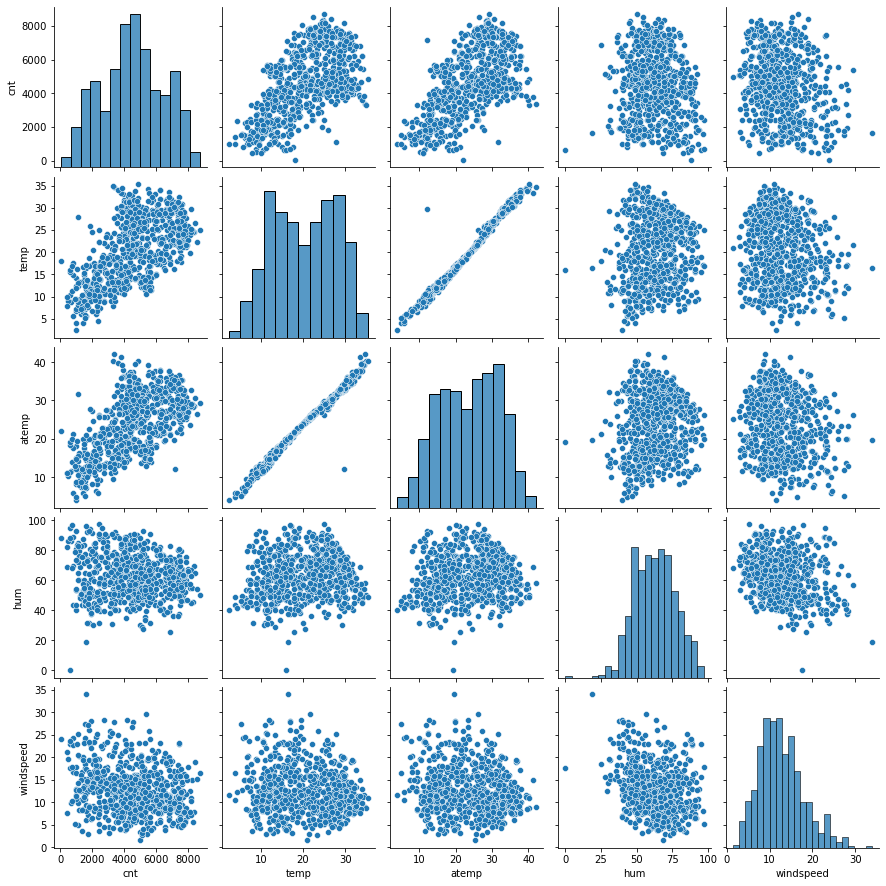

In [21]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bikedb,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### The above plots clarify that temp and atemp are having high correlation; We can also say that there is a linear relationship between TEMP and ATEMP

#### Visualize correlation between numerical variables

<Figure size 1440x1080 with 0 Axes>

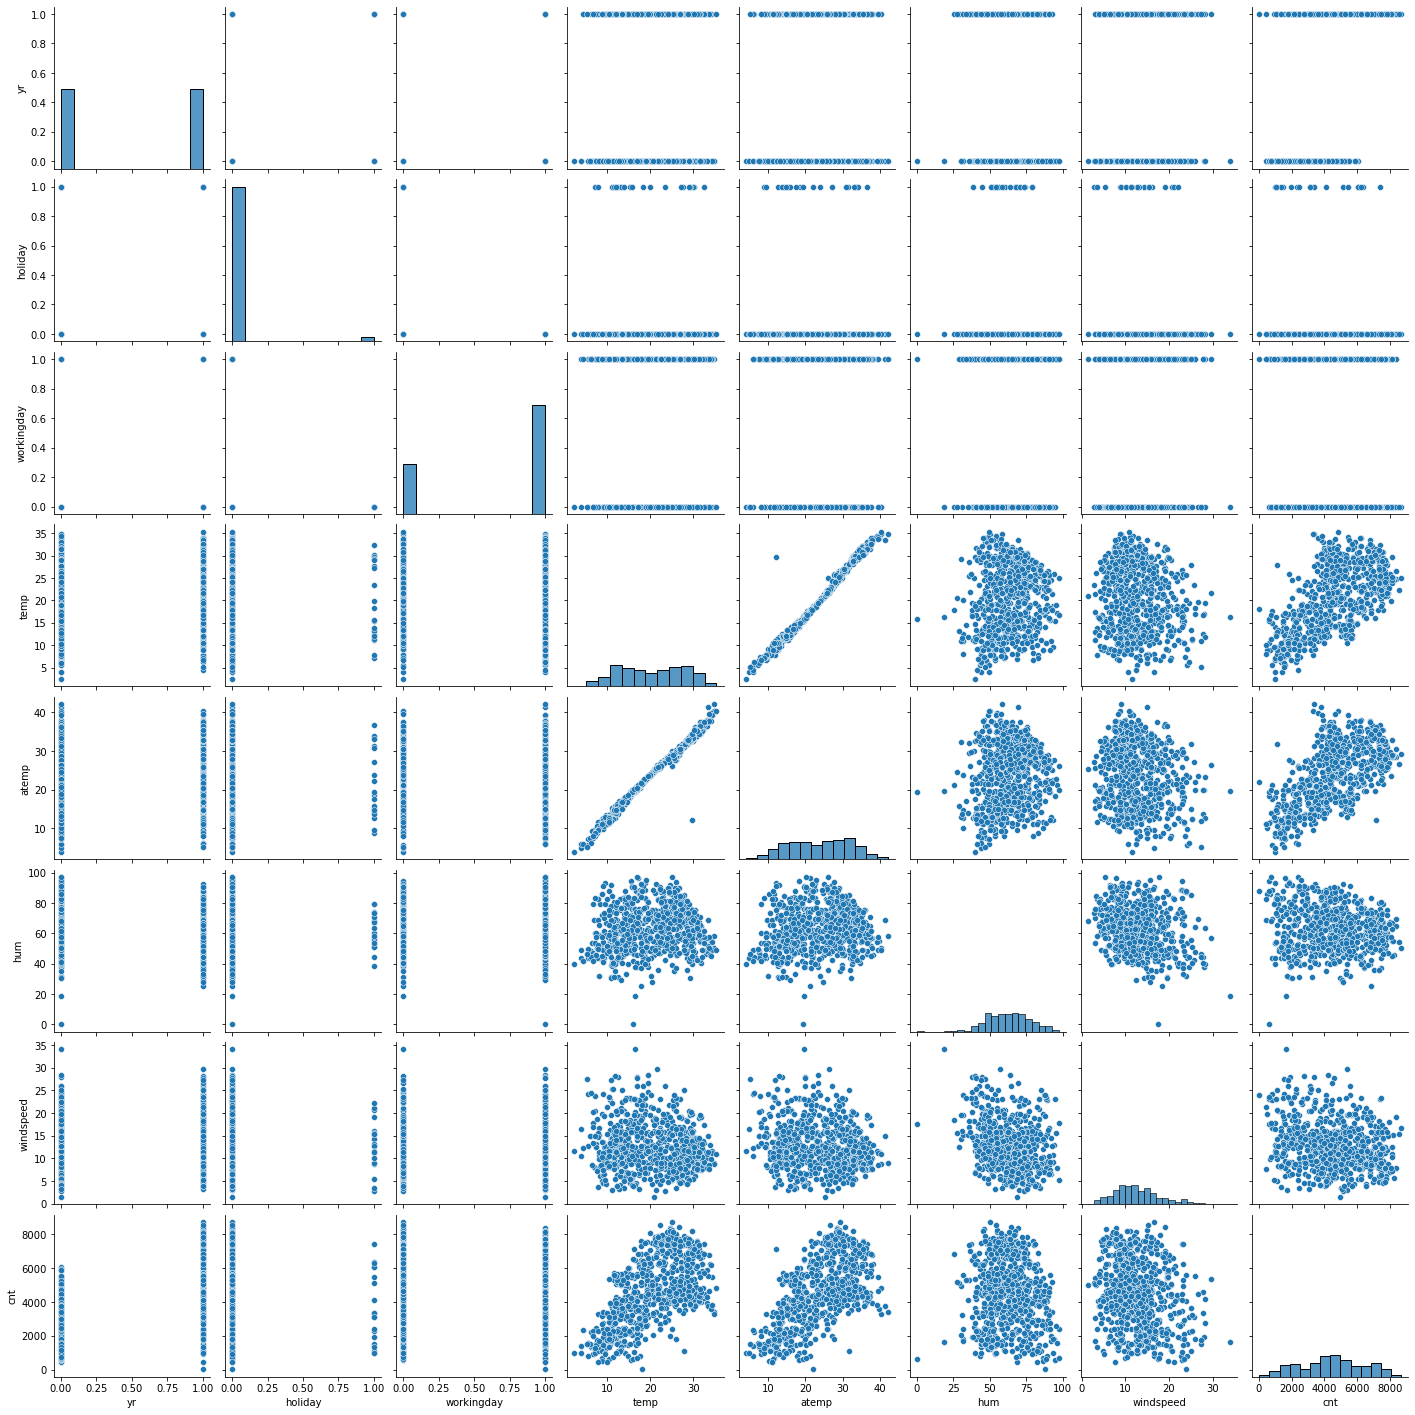

In [22]:
plt.figure(figsize=(20,15))
sns.pairplot(bikedb)
plt.show()

#### Temp and atemp shows correlation with cnt; hum and windspeed correlation is not clear.

### Heatmap for correlation between numeric variables

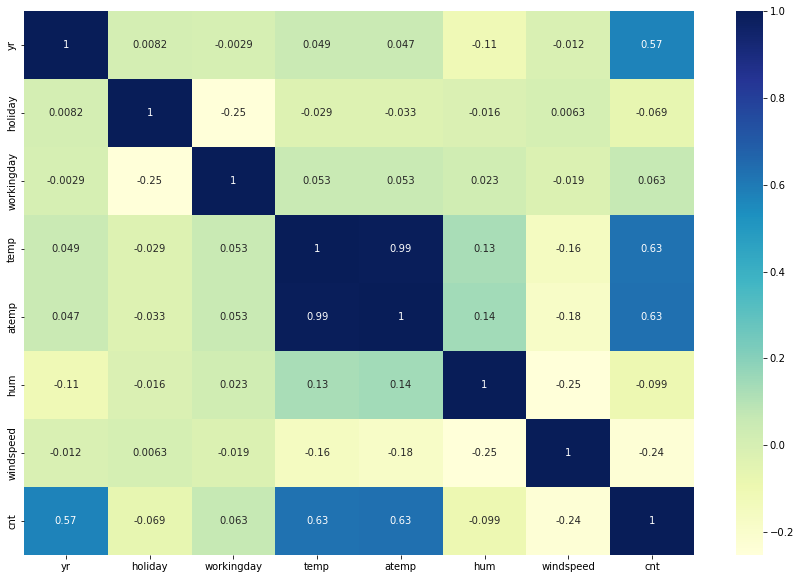

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(bikedb.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [24]:
# Temp and atemp are highly correleated (0.99).
# The strict linear relationship between temp and atemp enables us to drop one of these variables;
# let's drop atemp as temp is measurable accurate.
bikedb.drop(['atemp'],axis=1,inplace=True)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

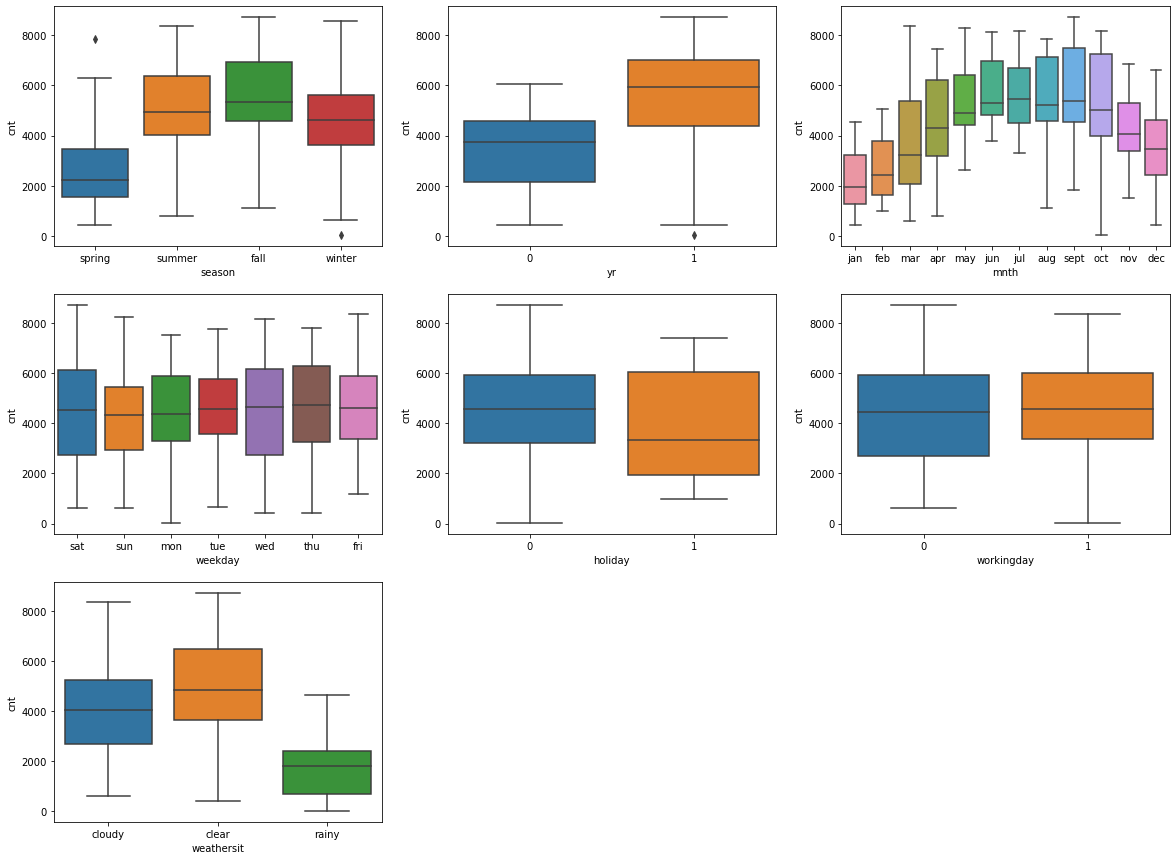

In [25]:
#visualising cnt against categorical variables

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bikedb)

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bikedb)

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bikedb)

plt.subplot(3,3,4)
sns.boxplot(x='weekday',y='cnt',data=bikedb)

plt.subplot(3,3,5)
sns.boxplot(x='holiday',y='cnt',data=bikedb)

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bikedb)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bikedb)


#### The above boxplots shows cnt dependency on season, yr, month, holiday, and weathersit where the cnt mean varies clearly between different categories, while the dependency is much less with weakday and workingday. 

### Linear regression Model fits
#### Now all variables are verified, understood, visualized, and proved dependency of cnt on many of categorical and numerical variables, thus we should consider linear regression Model. So let's start data preperation for linear regression
#### Create dummy variables for categorical cariables using pandas get_dummies. For each variable with n categories, we will create n-1 dummy variables where 0 in all represent the value of the first category. For example a 0 for weathersit_cloudy and 0 for weathersit_rainy means the weather is clear.

In [26]:
bikedb = pd.get_dummies(data=bikedb,columns=["season","mnth","weekday", "weathersit"], drop_first=True)
bikedb.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_cloudy', 'weathersit_rainy'],
      dtype='object')

In [27]:
bikedb

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_rainy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,0,1,0,0,1,0
726,1,0,1,10.386653,59.0000,10.416557,3095,1,0,0,...,0,0,0,0,0,0,0,0,1,0
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Splitting data into X and Y, and training and test sets.

In [28]:
#split the variables into Y and X; Y will hold the dependent variable to predict (cnt) and X will carry all other dependent variables.
Y=bikedb.pop('cnt')
X=bikedb

In [29]:
#Split Train and Test sets with 70% - 30% ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [30]:
# Check size and shape of train and test datasets
print(X_train.shape)
print(X_test.shape)

(511, 28)
(219, 28)


#### Scale the continious variables (temp, hum, and windspeed) of the training set
#### Use Normalized MinMax scaler

In [31]:
num_vars = ['temp','hum','windspeed']
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_rainy
683,1,0,1,0.327133,0.639330,0.327101,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
645,1,1,0,0.403972,0.731215,0.419004,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
163,0,0,1,0.717562,0.509660,0.708724,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.785745,0.415925,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
640,1,0,1,0.745598,0.817947,0.110593,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0


#### use heatmap to check for highly correlated variables

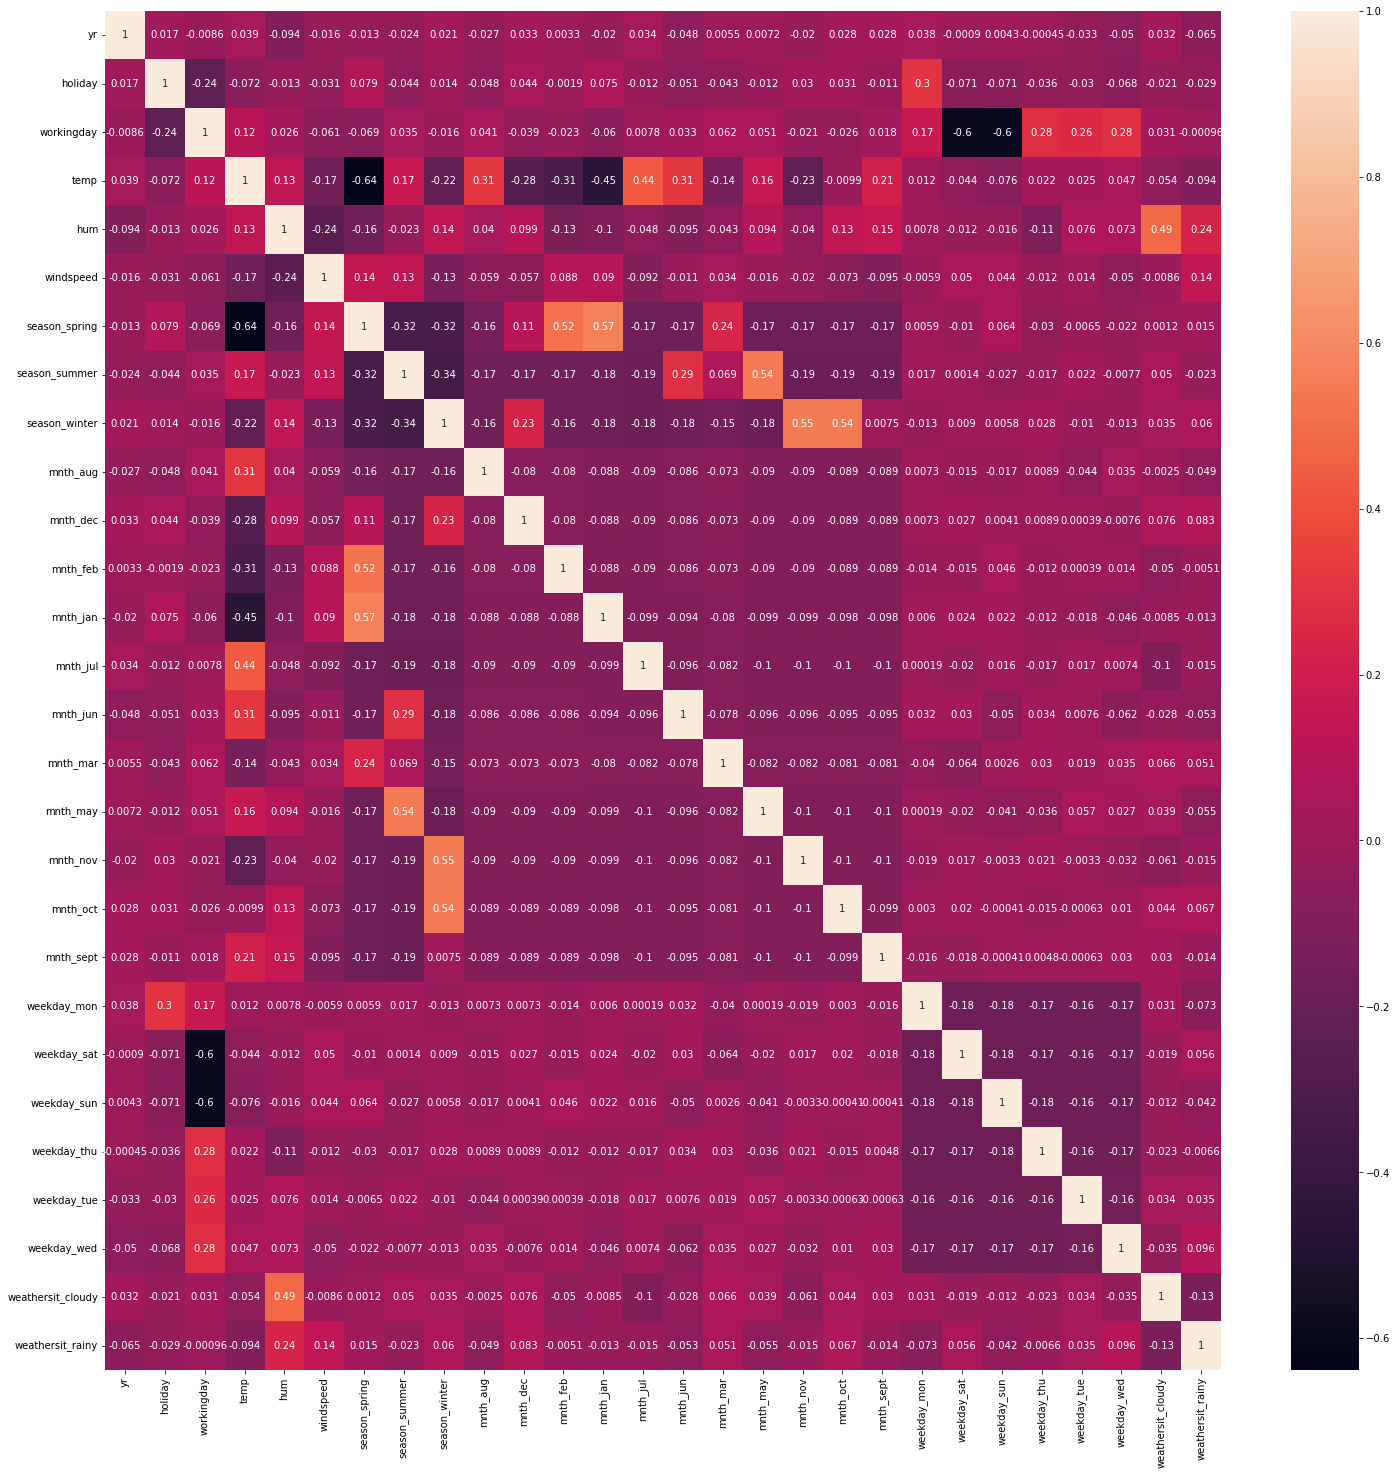

In [32]:
plt.figure(figsize = (25, 25))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

### Building the model

In [33]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
#Reduce the number of features to the half (from 28 to 14 through automated approach
rfe = RFE(lr, step = 14)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=14)

In [35]:
#Identify columns selected and their wwights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 2),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 2),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 2),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_cloudy', True, 1),
 ('weathersit_rainy', True, 1)]

In [36]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [37]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [38]:
#Print Columns selected by RFE. We will manually eliminate more columns from this list 
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_jul', 'mnth_mar', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_cloudy', 'weathersit_rainy'],
      dtype='object')

In [39]:
# columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_may', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [40]:
# train using the 14 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_jul', 'mnth_mar', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_cloudy', 'weathersit_rainy']]

In [41]:
X_train_rfe.shape

(511, 14)

### 1st Model

In [42]:
#Selected columns are columns selected by RFE
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_jul', 'mnth_mar', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weathersit_cloudy', 'weathersit_rainy']

build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.59e-186
Time:                        16:09:52   Log-Likelihood:                -4126.9
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3266.8064    303.10

#### Notice: R-Squared is 83.8% and Adjusted R-Squared is 83.4% which is good; F-statistic is 183.9 which is also good. 
##### in P-Values mnth_nov has the highest p-value
##### in VIF hum has the highest VIF (23.25) followed by temp (16.64) also very high

### 2nd Model

In [43]:
# Dropping the variable mnth_nov as it has negative coefficient and highest p-value
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_jul', 'mnth_mar', 'mnth_oct',
       'mnth_sept', 'weathersit_cloudy', 'weathersit_rainy']
build_model(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          7.36e-187
Time:                        16:09:52   Log-Likelihood:                -4127.6
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     497   BIC:                             8342.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3246.4982    302.65

#### R-Squared and Adjusted R-Squared are still v.good 0.838 and 0.834; highest p-value is 0.091

### 3rd Model

In [44]:
# Dropping the variable hum as it has highest VIF and no correlation with cnt (identified by plot)
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_jul', 'mnth_mar', 'mnth_oct',
       'mnth_sept', 'weathersit_cloudy', 'weathersit_rainy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.29e-184
Time:                        16:09:53   Log-Likelihood:                -4136.6
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     498   BIC:                             8354.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2406.9745    232.73

#### R-Squared and Adjusted R-squared are still good; season winter has highest p-value (0.185), and temp has highest VIF 5.48

### 4th Model

In [45]:
# Dropping the variable season_winter as has high p-value
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
        'mnth_jul', 'mnth_mar', 'mnth_oct',
        'mnth_sept', 'weathersit_cloudy', 'weathersit_rainy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.16e-185
Time:                        16:09:53   Log-Likelihood:                -4137.5
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     499   BIC:                             8350.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2604.3746    179.11

### 5th Model

In [46]:
# Dropping the variable mnth_jul as it has negative coefficient and high p-value
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
        'mnth_mar', 'mnth_oct', 'mnth_sept',
        'weathersit_cloudy', 'weathersit_rainy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.37e-184
Time:                        16:09:53   Log-Likelihood:                -4141.9
No. Observations:                 511   AIC:                             8306.
Df Residuals:                     500   BIC:                             8352.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2713.6652    176.58

###### 6th Model

In [47]:
# Drop the variable windspeed as it has high VIF and no clear correlation with cnt
cols = ['yr', 'holiday', 'temp', 'season_spring',
        'mnth_mar', 'mnth_oct', 'mnth_sept',
        'weathersit_cloudy', 'weathersit_rainy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.54e-182
Time:                        16:09:53   Log-Likelihood:                -4150.0
No. Observations:                 511   AIC:                             8320.
Df Residuals:                     501   BIC:                             8362.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2340.2192    151.97

###### 7th Model

In [48]:
# Drop the column Holiday as it has negative cooficient and highest p-value
cols = ['yr', 'temp', 'season_spring',
        'mnth_mar', 'mnth_oct', 'mnth_sept',
        'weathersit_cloudy', 'weathersit_rainy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     286.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.55e-181
Time:                        16:09:53   Log-Likelihood:                -4154.4
No. Observations:                 511   AIC:                             8327.
Df Residuals:                     502   BIC:                             8365.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2316.3078    152.93

#### This model seems perfect as it provides R-Squared 0.82, Adj R-squared 0.817, p-vlaues are all Zeros, and highest VIF 2.32 which is good. We will adopt this as the final model.

### Residual Analysis and Predictions

In [56]:
cols_final=cols
cols_final

['yr',
 'temp',
 'season_spring',
 'mnth_mar',
 'mnth_oct',
 'mnth_sept',
 'weathersit_cloudy',
 'weathersit_rainy']

In [62]:
#Function to build final model
def build_model_sk(X,y):
    lrf = LinearRegression()
    lrf.fit(X,y)
    return lrf

In [63]:
#Build the final model using sklearn and the final cols set
lr_final = build_model_sk(X_train[cols_final],y_train)
print(lr_final.intercept_,lr_final.coef_)

2316.307790617835 [ 1991.30598653  3072.62222301 -1539.13401568   562.6487056
   810.7397096    706.52388384  -687.11112201 -2417.20483247]


In [68]:
#Define a function to plot a histogram of the errors between actual and predicted cnt values
def plot_resd_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

In [69]:
y_train_pred = lr_final.predict(X_train[cols_final])

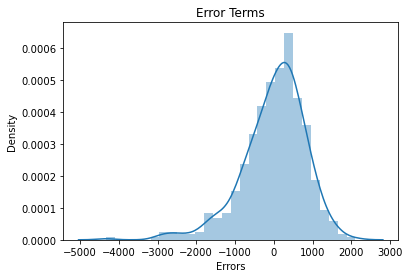

In [70]:
plot_resd_dist(y_train, y_train_pred)

#### The above plot shows that error are normaly distributed with mean near Zero.
#### Now that we have fitted the model and checked the normality of error terms, we can proceed and make predictions using the final model.

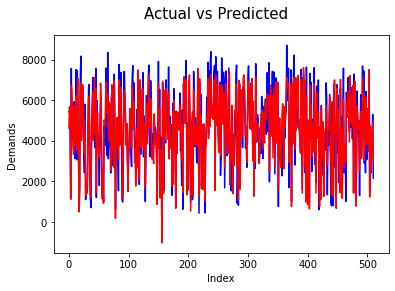

In [72]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [73]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8200946871589132

### Predicting on test dataset
#### First need to apply the scaling on test data

In [74]:
# We can only apply on temp as hum and windspeed are excluded from the model; 
# Yet it will not harm to do it all 3 variables as we might run another model including hum or windspeed.
num_vars = ['temp','hum','windspeed']
scaler = MinMaxScaler()
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_rainy
468,1,0,0,0.536626,0.401487,0.313071,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
148,0,0,0,0.769438,0.804036,0.363028,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
302,0,0,0,0.299316,0.555496,0.282038,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
355,0,0,1,0.439902,0.725969,0.001356,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
515,1,0,1,0.786308,0.388742,0.322536,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [77]:
# Predicting on test dataset and output r-squared 
y_test_pred = lr_final.predict(X_test[cols_final])
r2_score(y_test,y_test_pred)

0.7936218219216256

#### Evaluating the model

Text(0, 0.5, 'y_pred')

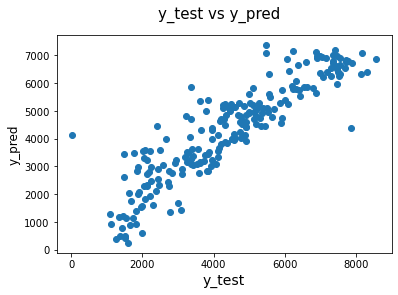

In [79]:
y_pred=y_test_pred
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

Conclusion
Significant variables to predict the demand for shared bikes

Year
Temperature
Season
Months (mainly March, Oct, Sept)
Weathersit (Clear, Cloudy, rainy)